# Scientific Bootcamp Day 1
### Spring 2021
https://github.com/Hekstra-Lab/scientific-python-bootcamp/tree/2021-Spring


0. Welcome!
1. How to get the most out of this bootcamp
2. Structure of bootcamp
3. Topics to come
4. Start!


## Who we are

**Ian** G4 in Applied Physics (`ianhuntisaak@g.harvard.edu`) He/Him  
**John** G4 in Applied Physics (`johnrussell@g.harvard.edu`) He/Him  
**Jenny** G4 in Applied Physics (`jcoulter@g.harvard.edu`) She/Her  
**Noah** Software engineer at Epic Systems (`noahhuntisaak@gmail.com`) He/Him  


## Who you are

Range of pre-existing knowledge

If you have a question, someone else it too. Everyone will benefit from you asking.


Please be friendly, if something is obvious to you it may not be obvious to someone else:  
(https://xkcd.com/1053/)


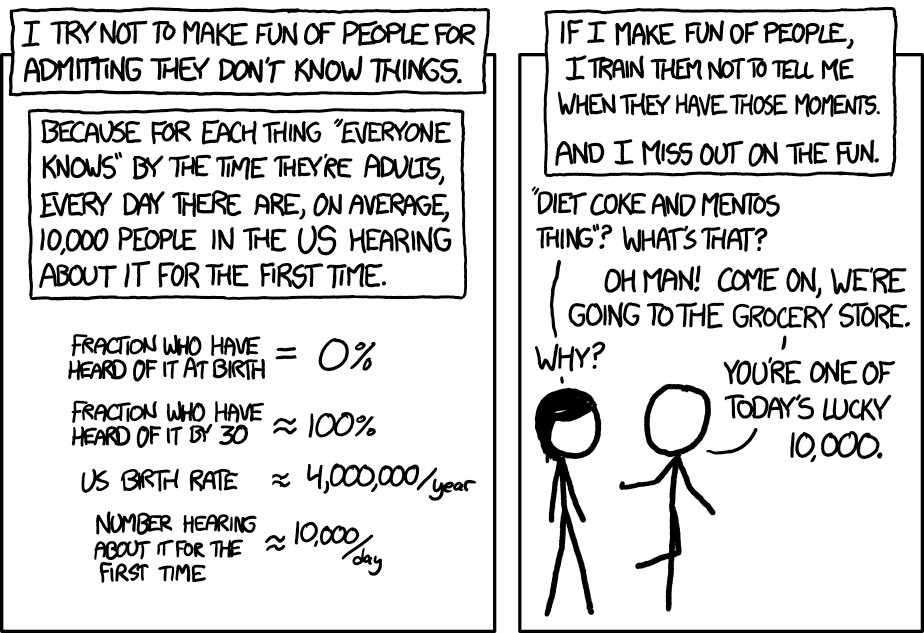

# Working in Jupyter notebooks
- Tool bar on the left
- Markdown cells
    - How to make new lines
    - Writing math with $\LaTeX$: $i\hbar\frac{\partial}{\partial t}\left|\Psi(t)\right>=H\left|\Psi(t)\right>$
    - Inserting screenshots


- **The most important keyboard shortcuts**
    - Indenting `crtl-[` or `crtl-]`
    - `Shift-tab`
    - `tab`
    - `shift-enter`
    

### Useful resources:    

[Jupyterlab UI documentation](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)  
[Jupyter shortcuts and other tips](https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/)  
[LATEX Math for Undergrads](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)

# Basic Python Review

## Dealing with errors

This is **the** fundamental skill of writing code. 

1. Read the last line of the error
2. Look at the line the error came from
3. Copy the error description to google
    - Can help to add key terms like "matplotlib", "python", or "numpy"
  
4. Ask a friend to look at it
5. Ask a question on stackoverflow
    - Make sure you ask the question effectively! Follow these guidelines: https://stackoverflow.com/help/minimal-reproducible-example

### Examples
#### Print out the last element of L

In [ ]:
L = [3, 4, 16, 23]
print(L[4])

#### For each value x in L print out $x^3 - 2\cdot(x-3)$

In [ ]:
for x in L:
    print(x**3-2*(x-3)

#### Googling error messages

In [ ]:
print("adf"+5)

## List and number manipulation

for loops!

In [ ]:
data = [3, 10, 0, 4, 8, 1]


In [ ]:
# Looking at variables

In [ ]:
# last thing in a cell will display

In [ ]:
# how long is data

### Accessing specific points in a list

**zero indexing**

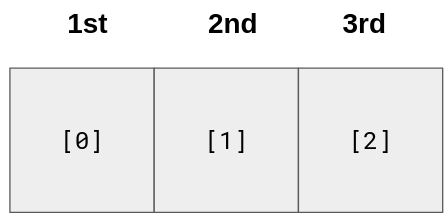

In [ ]:
# print out values in data that are greater than 5


Negative indexing

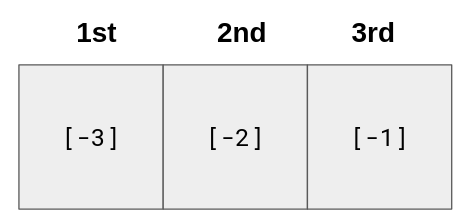

### Transforming values

**inplace**

**making a new list**

In [ ]:
# make a new list that has each element of data multiplied by 5.


**using `print` to debug**

In [ ]:
# take each element to the power of -1


## Breakout exercise

1. Work together!
2. Break the problem into smaller parts
3. If you know to solve it help the others
4. We will go around the breakout rooms to answer questions.



### 1. Triangular numbers

The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$a(0)=0$$
$$a(1)=1$$
$$a(n)=a(n−1)+n$$


The first 5 triangular numbers are: `[0, 1, 3, 6, 10]`

Create a list of the 1000 triangular numbers. If you get this correct then the final item in the list should be `499500`.

You can print out the final item with (`print(tri[-1])`).

In [ ]:

# seed the first element of the sequence
tri = [0]
# start with n=1 because we already defined the first element.
for i in range(1, 1000):
    # your code here


### 2. Tetrahedral numbers


The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).


**n.b.** Confusingly the Tetrahedral numbers start by sum from the 2nd triangular number wiht (`n=1`). So you may need to play around with the range of numbrs your loops access. A concrete examples here is what should go into the first few tetrahedral numbers.

$$Tetra_1 = 0 + 1$$
$$Tetra_2 = 0 + 1 + 3$$

Create an array of the first 999 Tetrahedral numbers. If you did this correctly then the last element should be `166666500`

The first 5 elements of this sequence are: `[1, 4, 10, 20, 35, ...]`

Hint: You may need to use two for loops for this.

In [ ]:
tetra = []


### 3. Numbers that are both triangular and tetrahedral.

Make a new list that contains numbers that both triangular and tetrahedral. There should be 6 matches in the first 1000 numbers.

In [ ]:
same = []


**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

## Multidimensional Lists

You can nest lists as deeply as you'd like.

In [ ]:
# one-d list


In [ ]:
# two-d list


### Indexing a 2D list of lists

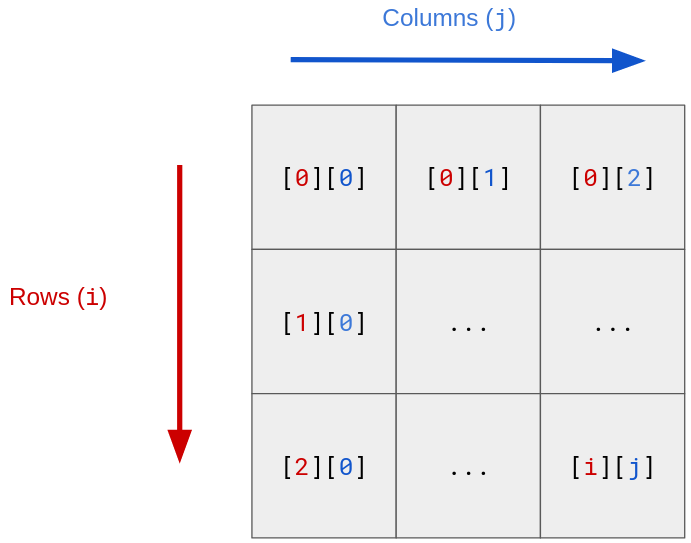

In [ ]:
# accessing an entire row


In [ ]:
# that's just a list, so we can do anything we want to it


In [ ]:
# columns are trickier to access.
# We don't want to hard code the shape, but it's tricky to get deeper shapes.

In [ ]:
# Lists can be abritrarily deep - just keep on indexing them

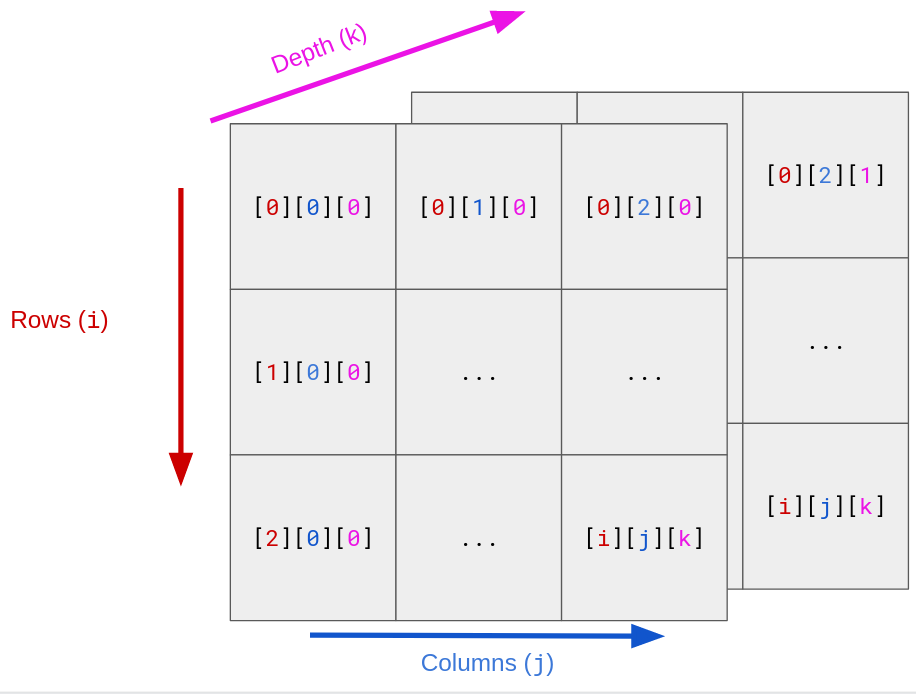

In [ ]:
threeD_list = [
    [
        [1, 1, 1],
        [2, 2, 2]
    ],
    [
        [3, 3, 3],
        [4, 4, 4]
    ]
]

# This is startingt get unwieldy, because they are different length so of list. This is length 2 list, holding two lists of length 2 each that each hold two lists of length 3. 
# We will use a better tool soon!


# Breakout rooms exercise

## 1.
In the next cell we've defined a variable `room_temp` that is a 2d array. This represents the temperature distribution in a room:
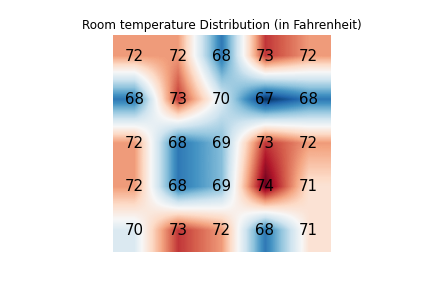

Unfortunately it's been measured in Farhenheit. So using `for` loops make a new array named `room_temp_celsius` and fill it with the values of `room_temp` but converted to celsius. The conversion formula is:
$$C = \frac{F- 32}{1.8}$$


In [ ]:
room_temp = [
    [72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]
]


## 2

Now assume we have some time series data of the temperature in the room.

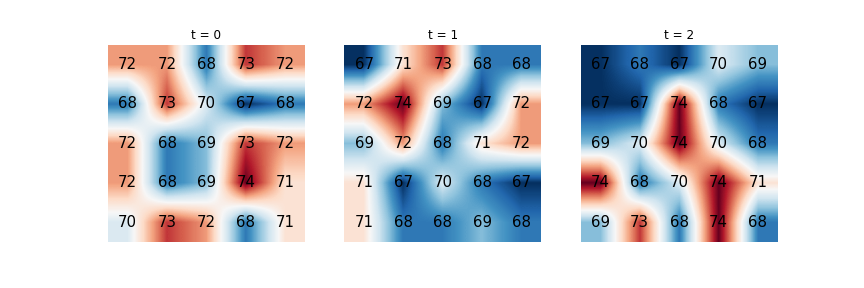

The variable `room_temp_3d` has three dimensions. Make a new array of this data converted to celsisus.

In [ ]:
room_temp_3d = [
    [[72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]],

    [[67, 71, 73, 68, 68],
    [72, 74, 69, 67, 72],
    [69, 72, 68, 71, 72],
    [71, 67, 70, 68, 67],
    [71, 68, 68, 69, 68]],

    [[67, 68, 67, 70, 69],
    [67, 67, 74, 68, 67],
    [69, 70, 74, 70, 68],
    [74, 68, 70, 74, 71],
    [69, 73, 68, 74, 68]]
]


## 3. Printing out nested slices

Using `for` loops and `if` statments print out the third column of the second time point of `room_temp_3d`
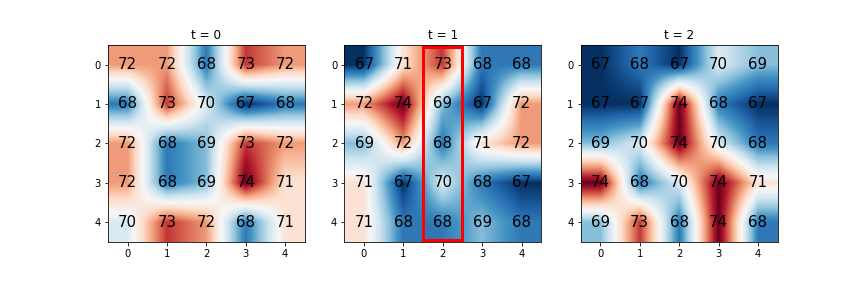

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----



## Numpy

### What are NumPy Arrays

Highly optimized multidimensional lists. Very fast for doing math!

See https://numpy.org/doc/stable/user/absolute_beginners.html


In [ ]:
from math import sin

import numpy as np

In [ ]:
N = 1000000
arr_list = list(range(N))

In [ ]:
# time math.sin + for loop


In [ ]:
# make a numpy array

In [ ]:
# time np.sin



### How to create arrays

**From a list**: we can just call np.array(list) to turn that list into a numpy array. But be careful the lists need to be shaped like a valid matrix.


In [ ]:
# turn the threeD_list into a numpy array. And look at it's shape



manually typing out lists sucks. There must be a better way!!

In fact numpy provides many functions for this
- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones

#### Quick exercise. 

Take 5 minutes and try calling `np.arange` and `np.linspace` to get familiar with what they create

### Making a multiplied list
The old way looked like this:

```
data = [3, 10, 0, 4, 8, 1]
new_list = []
for i in range(len(data)):
    new_list.append(data[i] * 5)
```

with Numpy we can do this much more succinctly.

Changing arrays inplace

### Doing math

There are many mathematical functions availiable to perform on arrays: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations

For this we will use [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) to generate arrays of evenly spaced numbers.


In [ ]:
# this extends to an arbitrary number of dimesions.



### using numpy to write math.

$$ x^2 \text{ for } x \in [0, 1, 2, ... 9]$$

$$ f(n) = 5 \cdot n  + \frac{6}{n}$$

for $n \in [1, 1.5, 2., ..., 10]$

## Breakout rooms


### 1. A more complex equation

Using `np.linspace` generate an array of 100 evenly spaced points between $0$ and $2 * \pi$. Then calculate the $sin$ of these values.

Hint: `np.pi` gives you the value of $\pi$


### 2. Triangular numbers

Triangular numbers but with Numpy!


The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$T(0)=0$$
$$T(1)=1$$
$$T(n)=a(n−1)+n$$

However there is also an explicit formula. 
$$T_n = \frac{n(n+1)}{2}$$

Calculate the first 1000 triangular numbers.
As a reminder the first 5 triangular numbers are: `[0, 1, 3, 6, 10]` and the 1000th triangular number is`499500`.


Hint: A good start is to make the numbers 1-1000 using `np.arange`

### 3. Tetrahedral numbers

The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).

Using the numpy function [cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) (`np.cumsum`) which stands for cumulative sum calculate the first 999 Tetrahedral numbers.
As a reminder the first 5 elements of this sequence are `1, 4, 10, 20, 35]` and the 999th element is `166666500`


### 4. Finding the intersection of triangular and tetrahedral numbers

Using numpy figure out which triangular numbers are also tetrahedral numbers. This is a little bit more complicated than can be accomplished with pure indexing, so our first thought should be to ask if Numpy has a function to do this. In this case the answer to that question is yes, and the function we want is `np.intersect1d`.

In general your first step should always be to google: `How to do I ___ in numpy?` and 9 times out of ten you'll find an answer with the first link.

Tip: If you don't like the way the arrays are printing out, turn them into integers by calling:

`print(arr.astype(int))` instead of just `print(arr)`

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

## More powerful indexing 

### Indexing numpy arrays.

In general this is easier and more powerful than indexing lists.

A good tutorial for this is: https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

and the definitive reference is: https://numpy.org/doc/stable/reference/arrays.indexing.html

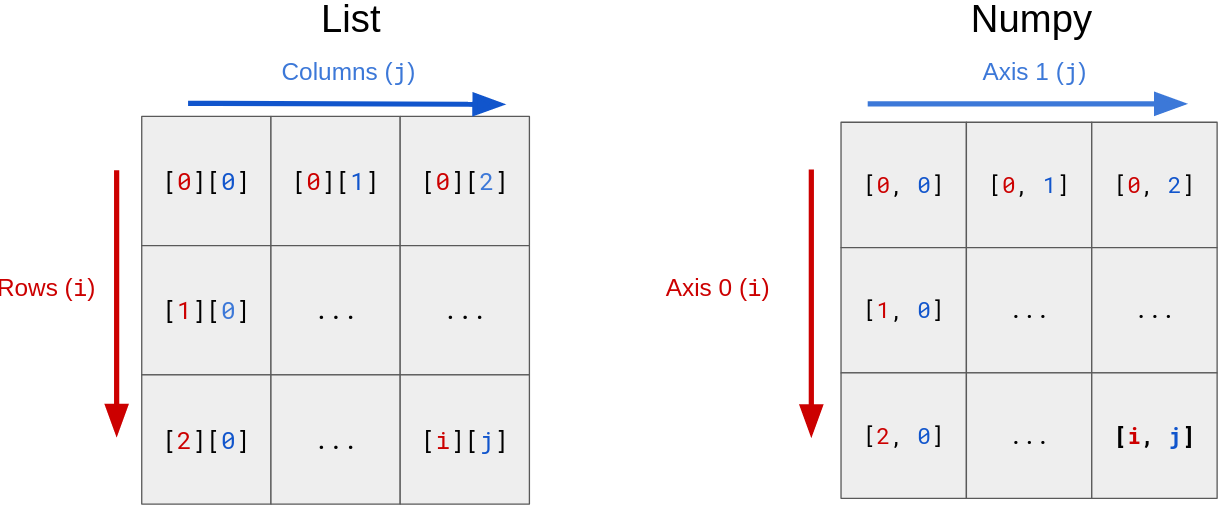

Same idea when we start adding more dimensions.


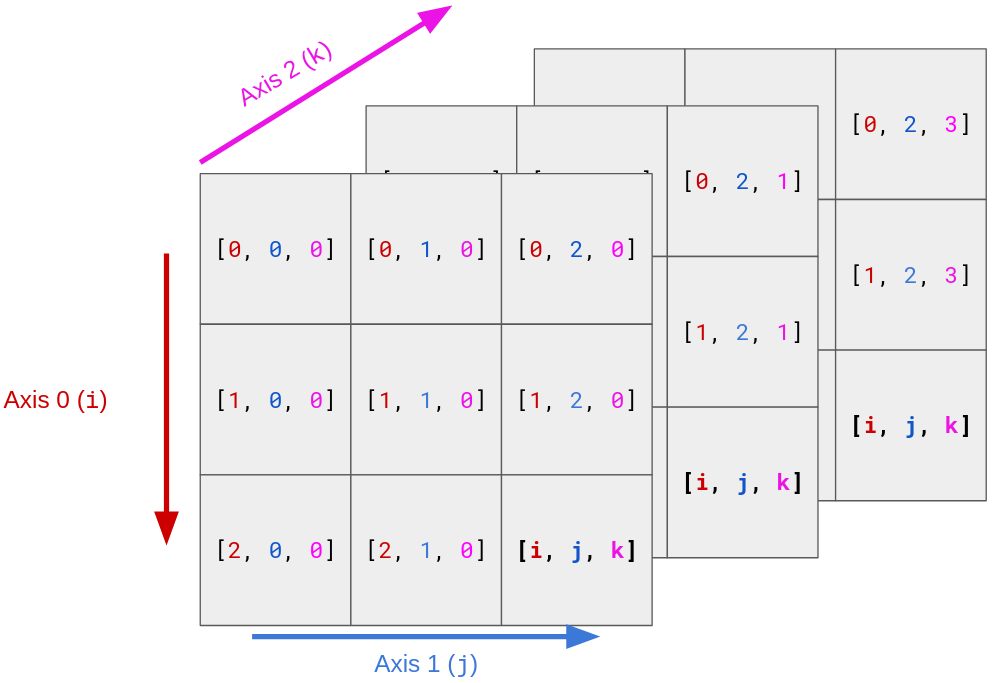

### Taking a whole dimension at once.

It was super annoying to get the 3 row of the second time point. So lets do it using the `:` symbol when we index.

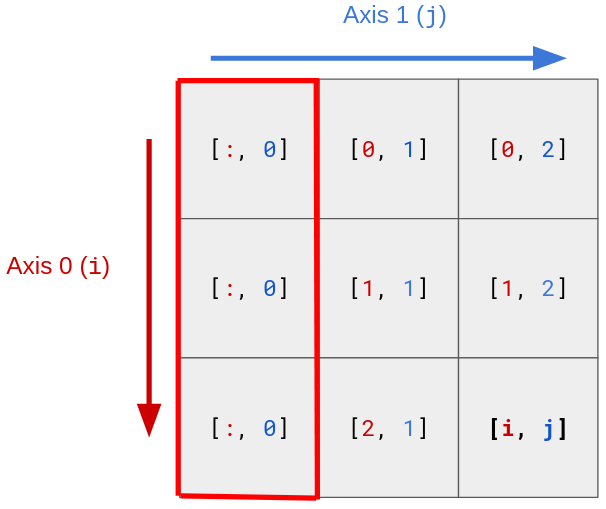

Various selections of portions of numpy arrays.

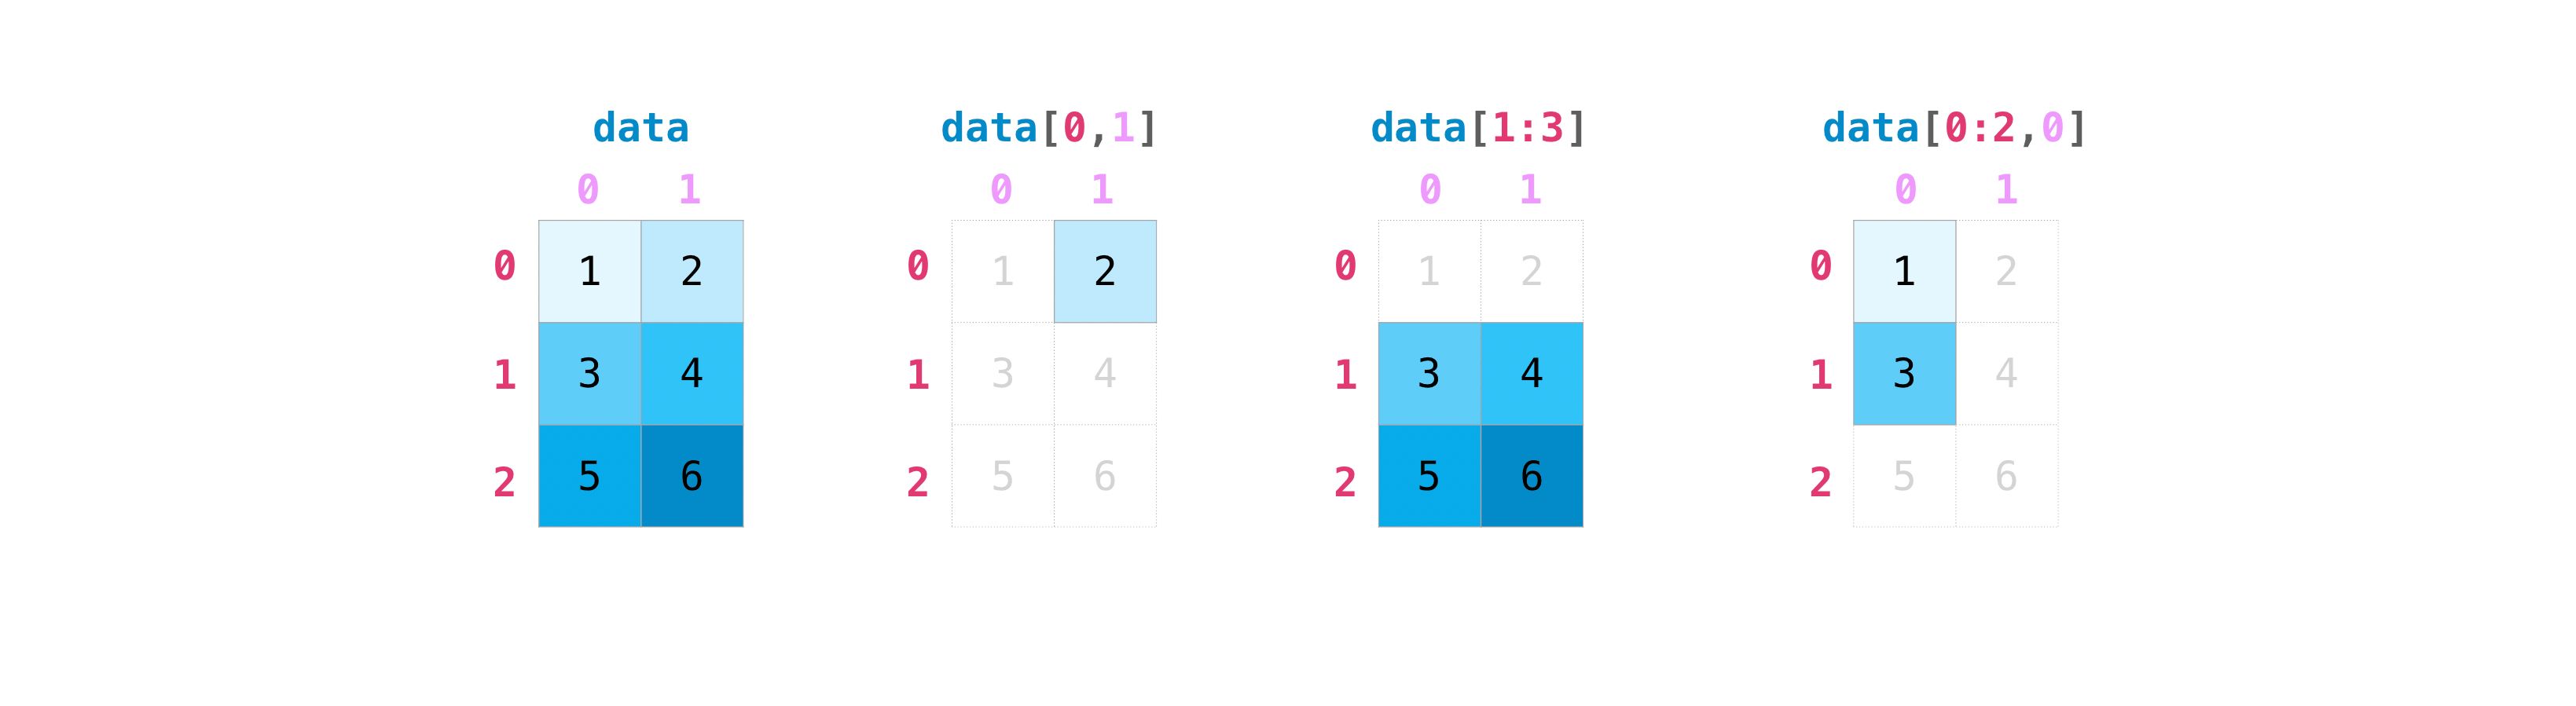

Let's try:

In [ ]:
data = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

In [ ]:
# when you get confused a good thing to do is always to look at the shape of the array



### Applying functions along an axis

Many numpy functions accept an `axis` argument. This allows us to control if they act on specific slices of the array, or over the entire array.

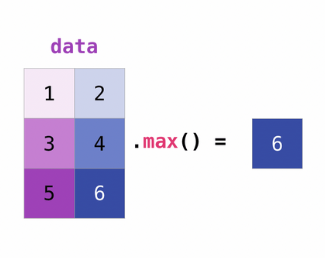

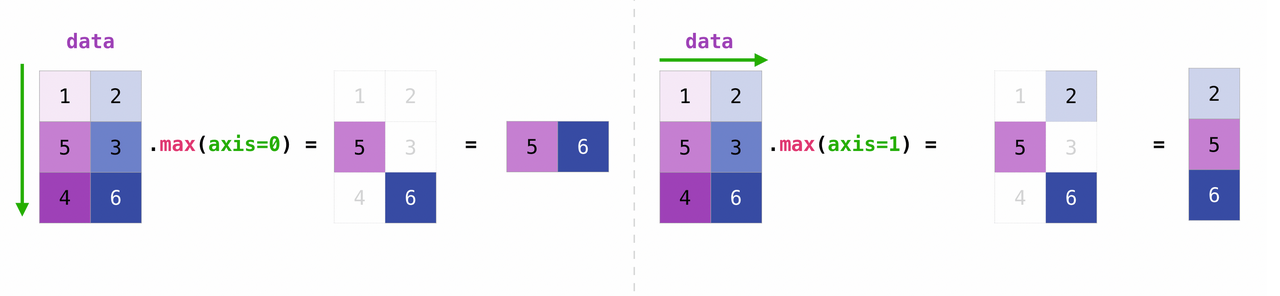



## Breakout Room


Turn the `room_temp_3d` into a Numpy array. Then use this array along with indexing to print out the third column of the second time point.

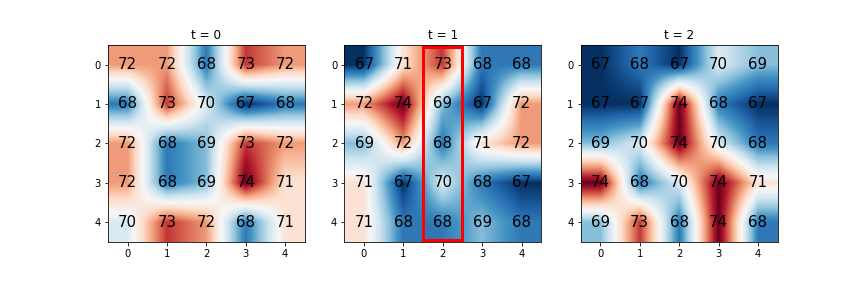

### 2. Average Temperature

What is the average temperature over all times and all squares.

### 3. Average temperature using `axis`

Using the `axis` argument to `np.mean` figure out:
1. The average room temperature at each time point
2. The average room temperature for each grid point averaged over all three time points.

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

### More Advanced Indexing

In [ ]:
# not limited to indexing with single numbers or ranges of numbers. We can also select multiple specific points


## Breakout

### 1. Indexing odd elements

Calculate the sum of all numbers with an odd index in the given array below.

Hint: Use `np.arange(start, stop, step)` to generate the array to use for indexing

In [ ]:
arr = np.array([ 1, 10, 17, 11,  7, 17,  6, 10,  5, 13, 14,  4, 16,  1,  0,  5,  5,
       16, 11,  8,  1,  5,  6,  9, 16,  5,  9,  0, 18,  5, 10, 15,  9, 14,
        2, 18, 13,  7, 13, 16, 16,  0,  0, 14, 15,  5, 18,  5,  2, 13, 12,
       16,  4, 12,  3,  7,  7, 10,  8,  6, 13,  9, 10,  4,  1,  7, 12, 13,
        2,  2,  6, 16,  6,  4,  3, 17,  8, 10, 18,  8, 17, 10,  7,  4,  1,
        0, 10, 13,  7, 12,  8, 12, 12,  9, 12, 19,  1,  4,  9,  3])


### 2. Indexing even elements - multidimensional

The data we load in the next cell (`new_data`) is a multidimensional array with 3 dimensions. If the first axis represents a time axis (like the room temperature data) what is the sum of all the data at the even numbered time points?

Hint 1: Start out by looking at `new_data.shape`  
Hint 2: Use `np.arange(start, stop, step)` to generate the array to use for indexing



In [ ]:
new_data = np.load('data/odd-elem-multi-idx.npy')

### 3. Indexing and preserving axes.

Now use array-indexing to extract the even numbered time points in `new_data` and then use `np.mean(..., axis=???)` to get the 2D average of each time point.

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

# Basic plotting

**Matplotlib cheatsheets:** https://github.com/matplotlib/cheatsheets#cheatsheets


**Tutorials** https://matplotlib.org/3.3.4/tutorials/index.html  
**Good goodling phrase:** "How to make a ___ plot in matplotlib"
**Getting help**

For both of these **make sure** you post a [minimal example](https://matthewrocklin.com/blog/work/2018/02/28/minimal-bug-reports)


1. https://stackoverflow.com/
2. https://discourse.matplotlib.org/
   - More lenient with what is an acceptable question
   - monitored by the Matplotlib devs
   - Slower to get an answer than stackoverflow

In [ ]:
import matplotlib.pyplot as plt

## Breakout rooms

### 1. Plotting a mathematical function

Plot  $ y(t) = e^{-5 \cdot t}$ for $t \in [0,1]$

Hint 1: Use `np.linspace` and `np.exp` to do this.  
Hint 2: Call `plt.plot` multiple times

### 2. Plotting many lines
Plot  $ y(t) = e^{-at}$ for $t \in [0,1]$ for these values of $a$: [1, 5, 10]

Hint: Use `np.linspace` and `np.exp` to do this.
Hint 2: Call `plt.plot` multiple times

You can also use functions like `plt.ylabel` and `plt.xlaebl` to set the x and y labels like in this image:

<img src='images/math_2.png' width=40%>


### 3. Sorting two arrays in parallel

Often if you are plotting data it may be out of order. If you just call `plt.plot` on data like this you can end up with spaghettified mess.
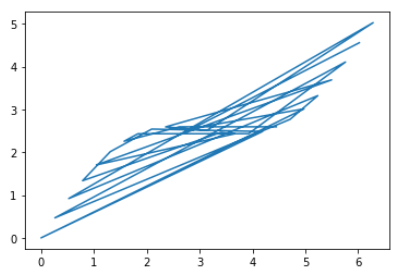

Use `np.argsort` to make an array of indices that sorts the `x` values. Then use these indices to sort both the `x` and `y` arrays and plot them. Once correctly sorted the plot will look like this:

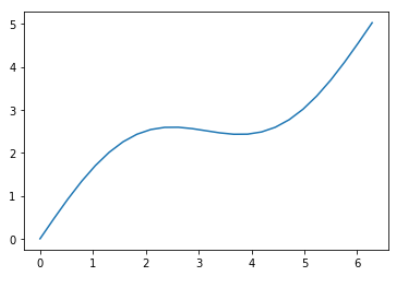


In [ ]:
x = np.array([6.02138592, 2.87979327, 4.97418837, 0.        , 4.1887902 ,
       2.0943951 , 1.30899694, 0.78539816, 3.40339204, 3.66519143,
       1.04719755, 5.49778714, 2.35619449, 3.14159265, 6.28318531,
       0.52359878, 5.23598776, 4.71238898, 0.26179939, 5.75958653,
       3.92699082, 1.83259571, 1.57079633, 2.61799388, 4.45058959])
y = np.array([4.55828969, 2.56265366, 3.01342487, 0.        , 2.48500676,
       2.54154149, 2.01312338, 1.33542531, 2.46389459, 2.43215314,
       1.70378344, 3.69112293, 2.59206237, 2.51327412, 5.02654825,
       0.91887902, 3.3227648 , 2.76991118, 0.46825856, 4.10766923,
       2.43448587, 2.4320024 , 2.25663706, 2.5943951 , 2.59454585])

fig, ax = plt.subplots()
plt.plot(x,y)

#### 4. Final Exercise

This one is harder. Don't worry if you don't finish it before we call you back.

Find the lowest point of 
$$y = \sin(x) - \cos(5\cdot log_2(x))$$ 
between $x=1$ and $x=40$. Then using`plt.axhline` and `plt.axvline` produce this plot:

<img src='images/indexing_func_min.png' width=40%>

Look at the functions: `np.argmin`, `np.argmax`

## Thanks for attending day!

We'll come back to the main zoom room soon. In the meantime please fill out this super brief anonymous google form. This is to help us set the pace for the next two days and to improve this bootcamp in the future. https://forms.gle/cszAXP3c1QC3S1Ve8

If you feel comfortable emailing John and Ian with specific feedback that's also totally welcome.